In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [156]:
df=pd.read_csv('datasets_4511_6897_diabetes.csv')

In [157]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
df.shape

(768, 9)

In [159]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

it is nice to see that there is no null values, it saves time 

In [160]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


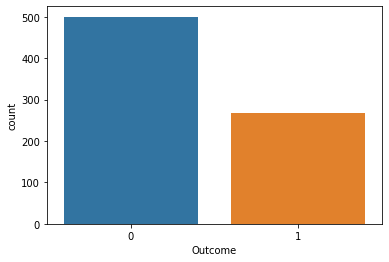

In [161]:
#lets check for Balance Dataset
sns.countplot(df['Outcome'])

we can see that we do not have to worry about dataset

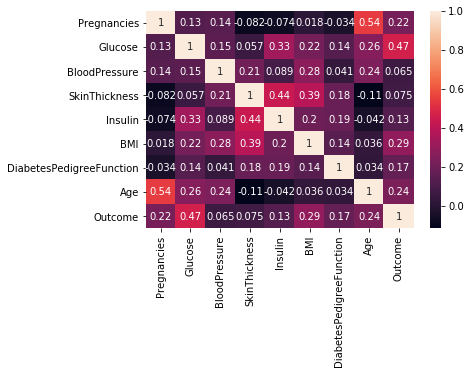

In [162]:
sns.heatmap(df.corr(),annot=True)

we can see Glucose having positive correlation with our target and it is obvious.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

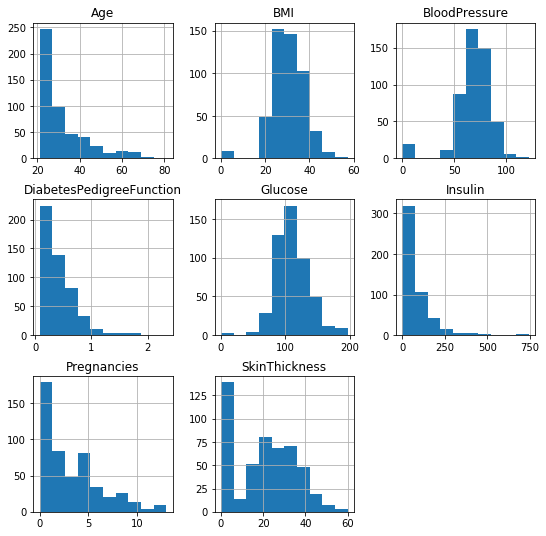

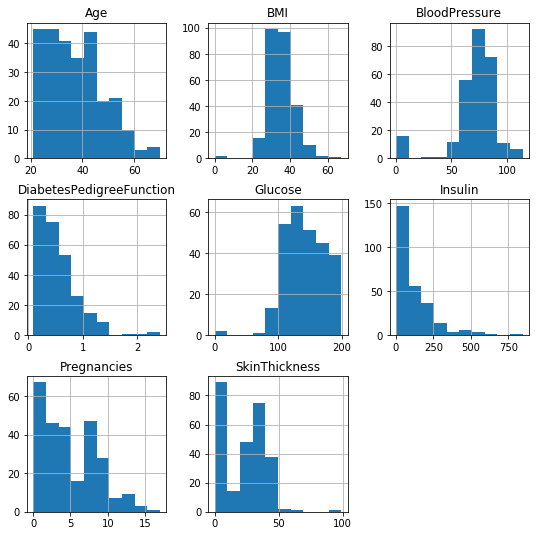

In [150]:
df.groupby('Outcome').hist(figsize=(9, 9))

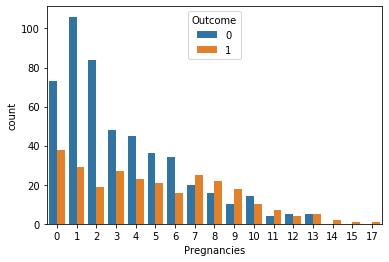

In [163]:
sns.countplot(df['Pregnancies'],hue=df['Outcome'])

## detection outliers:
1] a living person cannot have diastolic pressure of zero.

2] Even after fasting glucose levels would not be as low as zero. 

3] For normal people, skin fold thickness can’t be less than 10 mm better yet zero.

4] BMI Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.

5] In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

In [151]:
print('total zero blood pressure rows :',len(df[df.BloodPressure==0]))
df[df.BloodPressure==0].groupby('Outcome')['Age'].count()

total zero blood pressure rows : 35


Outcome
0    19
1    16
Name: Age, dtype: int64

In [152]:
print('total zero Glucose rows :',len(df[df.Glucose==0]))
df[df.Glucose==0].groupby('Outcome')['Age'].count()


total zero Glucose rows : 5


Outcome
0    3
1    2
Name: Age, dtype: int64

In [153]:
print('total zero skinthickness rows :',len(df[df.SkinThickness==0]))
df[df.SkinThickness==0].groupby('Outcome')['Age'].count()

total zero skinthickness rows : 227


Outcome
0    139
1     88
Name: Age, dtype: int64

In [154]:
print('total zero BMI rows :',len(df[df.BMI==0]))
df[df.BMI==0].groupby('Outcome')['Age'].count()

total zero BMI rows : 11


Outcome
0    9
1    2
Name: Age, dtype: int64

In [44]:
print('total zero insulin rows :',len(df[df.Insulin==0]))
df[df.Insulin==0].groupby('Outcome')['Age'].count()

total zero insulin rows : 374


Outcome
0    236
1    138
Name: Age, dtype: int64

### We have detected outliers and we can preprocess it by two methods:
1] first we can remove all the ouliers out there but we have less data and it can lose important information.

2] we can replace outliers by mean and median, but in our case if we put median or mean values in blood pressure column then it will give us wrong signal.



I am going to remove zero values from three columns which having less outliers.

In [164]:
data=df[(df.BloodPressure!=0) & (df.Glucose!=0) & (df.BMI!=0)]

In [165]:
# shape after exclude zero values from three features
data.shape

(724, 9)

In [166]:
#split your data
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [179]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y.values,test_size=0.2)

In [169]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [180]:
models=[RandomForestClassifier(),XGBClassifier(),SVC(),LinearSVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
names=[]
scores=[]
for model in models:
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    names.append(model.__class__.__name__)
    
classifiers=pd.DataFrame({'Algorithms':names,'testing_accuracy': scores})

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [181]:
classifiers

,Algorithms,testing_accuracy
0,RandomForestClassifier,0.800000
1,XGBClassifier,0.765517
2,SVC,0.806897
3,LinearSVC,0.793103
4,KNeighborsClassifier,0.772414
5,DecisionTreeClassifier,0.710345


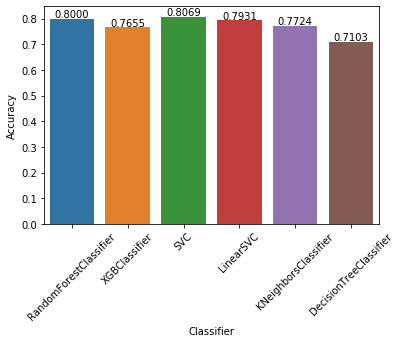

In [185]:
axis=sns.barplot(x = 'Algorithms', y = 'testing_accuracy', data =classifiers)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
for p in axis.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()


In [186]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomForestClassifier()
param={
    'n_estimators':[x for x in range(0,2000,200)],
    'max_depth':[6,8,10,15,20,25,30,35,40,50,60,70,80],
    'min_samples_split':[1,2,3,5,6,7,8,10,12],
    'min_samples_leaf':[1,2,3,5,6,7,8,10,12,14,15]   
}

randomcv=RandomizedSearchCV(random,param_distributions=param,)


In [187]:
randomcv.fit(X_train,y_train)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [189]:
print(randomcv.best_score_)
print(randomcv.best_params_)

0.7668065967016492
{'n_estimators': 1200, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 10}


In [190]:
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

C:\Users\Sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8


In [191]:
# we got 77% accuracy after hypertuning the parameter of our RandomForestClassifier
import pickle
filename='diabetes_rfc.pkl'
pickle.dump(model,open(filename,'wb'))
